# Identify cause of excess sea ice formation on the Weddell Sea continental shelf

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import sys
import cmocean
sys.path.append('/home/users/birgal/')

In [2]:
base_dir = '/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/'
run_dir  = f'{base_dir}output/'

In [3]:
mesh_mask = xr.open_dataset(f'{base_dir}bathymetry/mesh_mask-20250715.nc').squeeze().rename({'nav_lev':'deptht'})

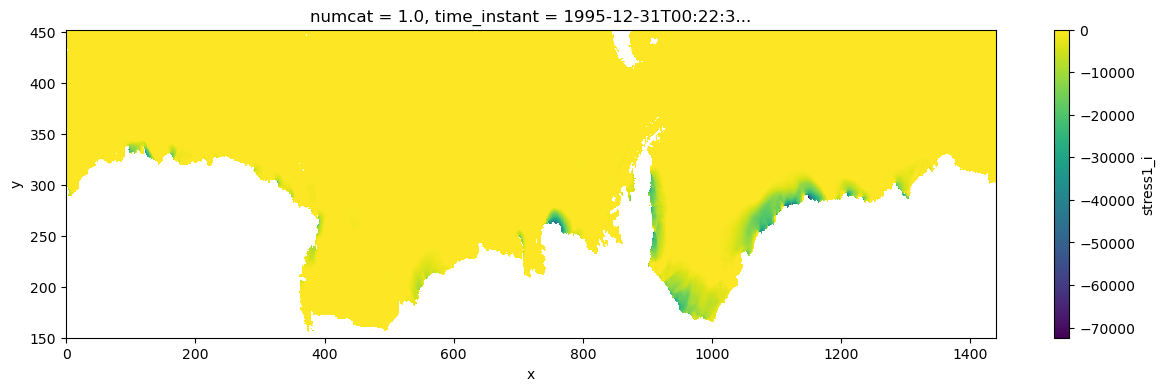

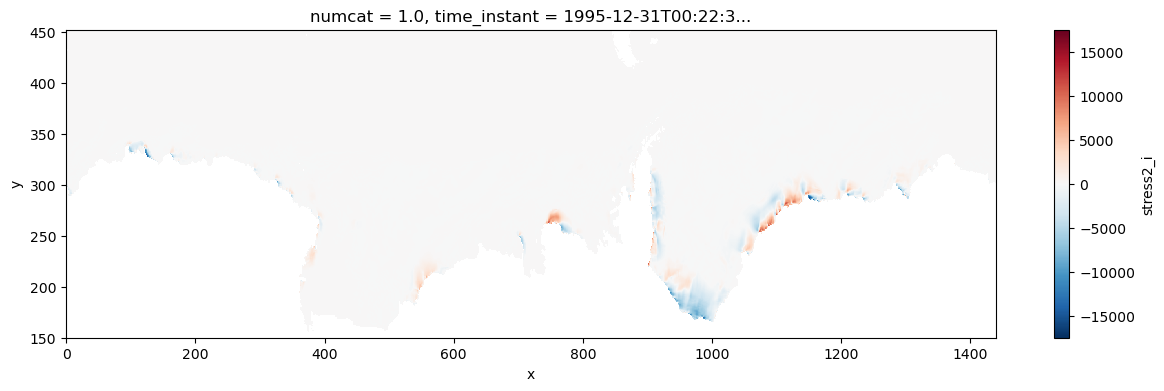

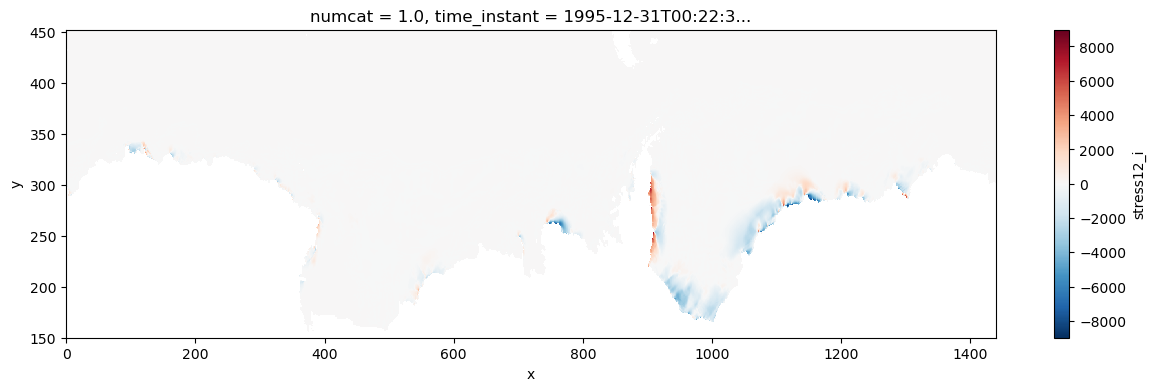

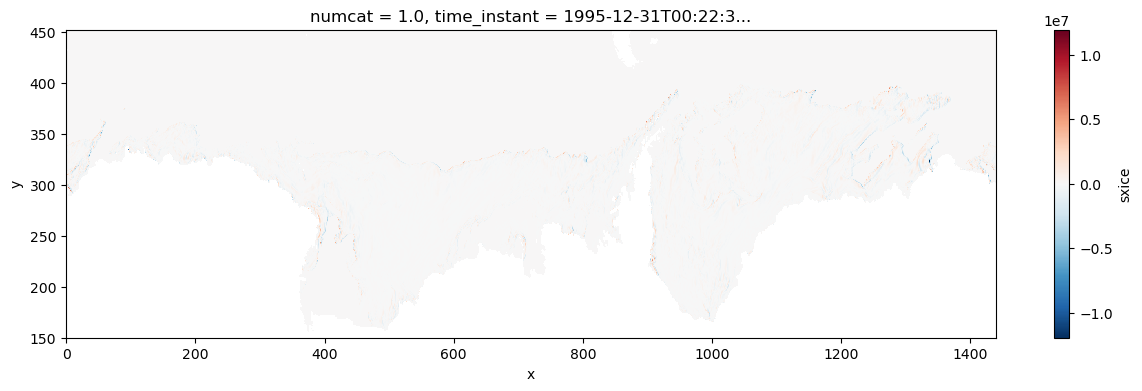

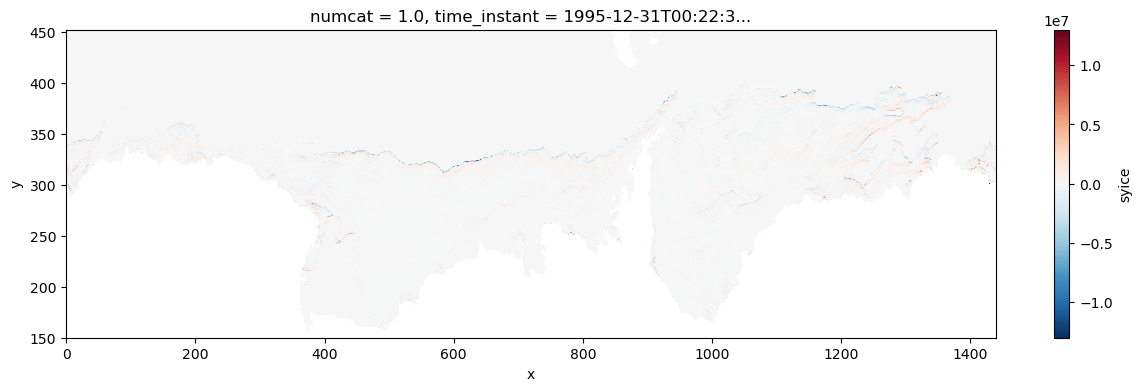

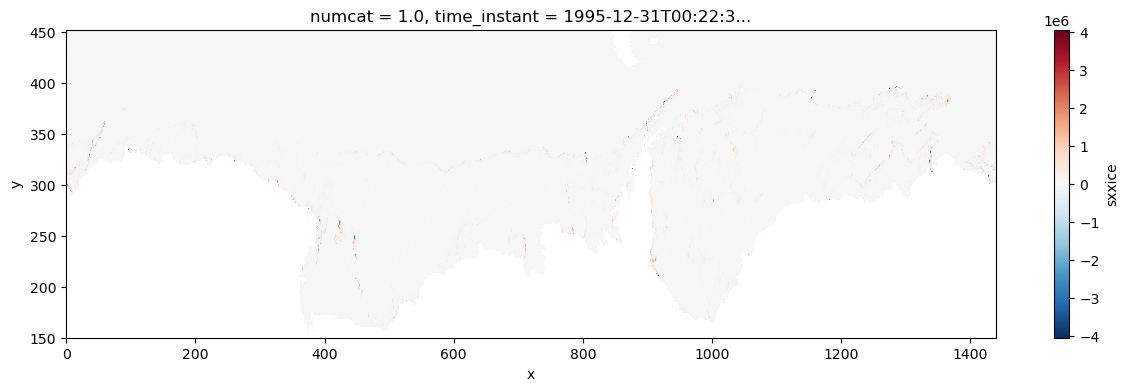

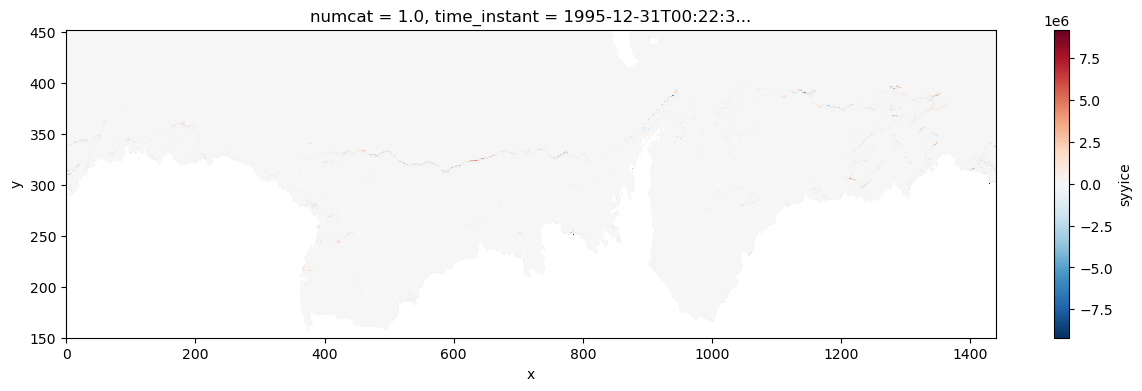

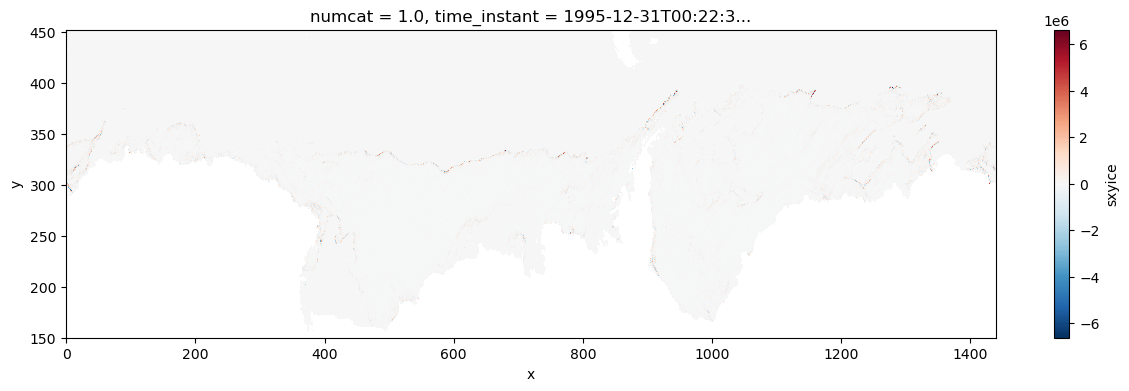

In [63]:
for var in list(ds.keys())[0:10]:
    try:
        ds[var].where(mesh_mask.tmask.isel(deptht=0)!=0).plot(figsize=(15,4), ylim=(150,None), label=var)
    except:
        continue

In [35]:
year=1993
year2=1994
year3=1995
ds_era    = xr.open_dataset(f'{run_dir}ERA5_1h_tune0_efr020/files1/eANT025.L121_1m_{year3}0101_{year3}1231_icemod_compressed.nc')
# ds_base   = xr.open_dataset(f'{run_dir}CESM2_3hwind_1979/files0/eANT025.L121_1m_{year}0101_{year}1231_icemod.nc')
# ds_test1  = xr.open_dataset(f'{run_dir}CESM2_3hwind_1979_test1_winds/files0/eANT025.L121_1m_{year2}0101_{year2}1231_icemod_compressed.nc')
# ds_bugfix = xr.open_dataset(f'{run_dir}CESM2_3hwind_1979_bugfix2/files0/eANT025.L121_1m_{year2}0101_{year2}1231_icemod_compressed.nc')
ds_t0955  = xr.open_dataset(f'{run_dir}CESM2_3hwind_1979_t0_0955/files0/eANT025.L121_1m_{year3}0101_{year3}1231_icemod.nc')
ds_capped = xr.open_dataset(f'{run_dir}CESM2_3hwind_1979_capped/files0/eANT025.L121_1m_{year2}0101_{year2}1231_icemod.nc')
ds_t0     = xr.open_dataset(f'{run_dir}CESM2_3hwind_1979_t0/files0/eANT025.L121_1m_{year3}0101_{year3}1231_icemod.nc')
# ds_efr005 = xr.open_dataset(f'{run_dir}CESM2_3hwind_1979_efr005/files0/eANT025.L121_1m_{year2}0101_{year2}1231_icemod.nc')
ds_era_wind = xr.open_dataset(f'{run_dir}CESM2_3hwind_1979_ERA5_winds/files0/eANT025.L121_1m_{year}0101_{year}1231_icemod_compressed.nc')
# ds_nocorr   = xr.open_dataset(f'{run_dir}CESM2_3hwind_1979_nocorr_winds/files0/eANT025.L121_1m_{year}0101_{year}1231_icemod_compressed.nc')
# ds_on_wind  = xr.open_dataset(f'{run_dir}CESM2_3hwind_1979_online_winds/files0/eANT025.L121_1m_{year}0101_{year}1231_icemod_compressed.nc')

Text(0.5, 1.0, 'CESM2 amax=0.97')

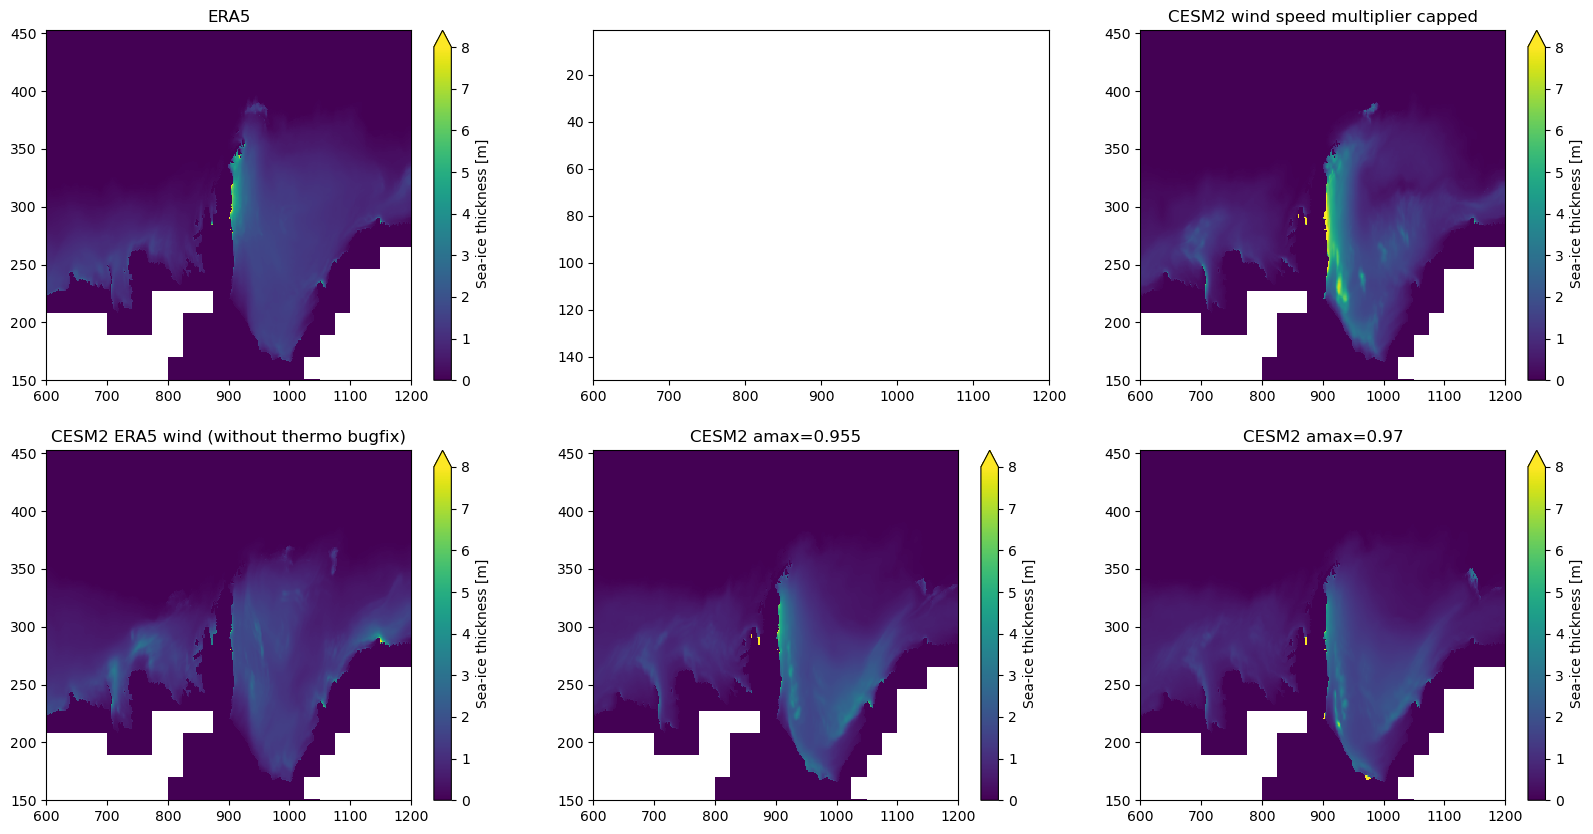

In [26]:
var='sithic'
kwags = {'vmin':0, 'vmax':8}
fig, ax =plt.subplots(2,3, figsize=(20,10))
ds_era[var].isel(time_counter=5).plot(ax=ax[0,0], **kwags)
# ds_base[var].isel(time_counter=5).plot(ax=ax[0,1], **kwags)
ds_capped[var].isel(time_counter=5).plot(ax=ax[0,2], **kwags)
ds_era_wind[var].isel(time_counter=5).plot(ax=ax[1,0], **kwags)
# ds_test1[var].isel(time_counter=5).plot(ax=ax[1,1], **kwags)
# ds_nocorr[var].isel(time_counter=5).plot(ax=ax[1,2], **kwags)
ds_t0955[var].isel(time_counter=5).plot(ax=ax[1,1], **kwags)
ds_t0[var].isel(time_counter=5).plot(ax=ax[1,2], **kwags)

for axis in ax.ravel():
    axis.set_xlabel(''); axis.set_ylabel('')
    axis.set_ylim(150,None)
    axis.set_xlim(600,1200)

ax[0,0].set_title('ERA5')
# ax[0,1].set_title('CESM2 reference')
ax[0,2].set_title('CESM2 wind speed multiplier capped')
ax[1,0].set_title('CESM2 ERA5 wind (without thermo bugfix)')
ax[1,1].set_title('CESM2 amax=0.955')
ax[1,2].set_title('CESM2 amax=0.97')

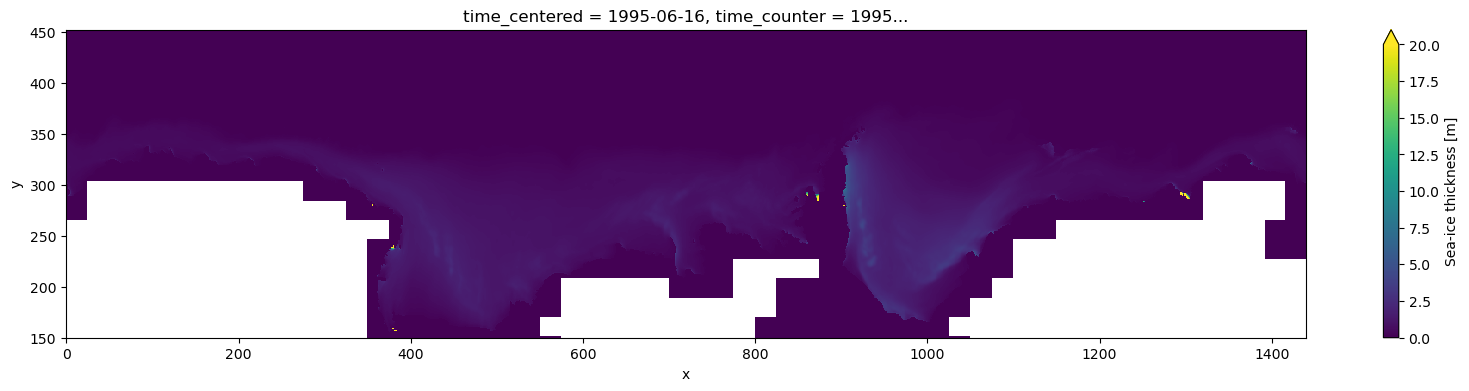

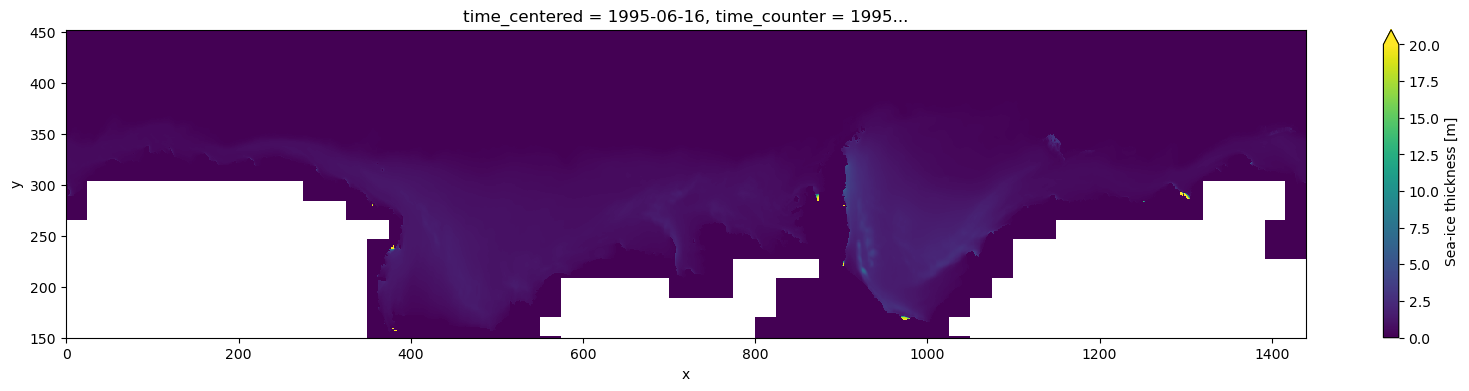

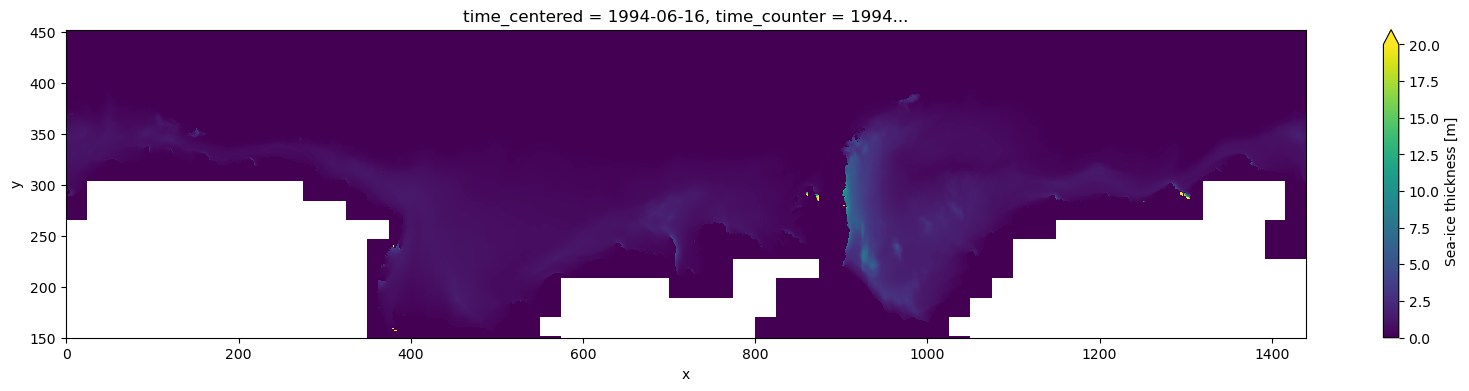

In [30]:
ds_t0955[var].isel(time_counter=5).plot(figsize=(20,4), ylim=(150,None), vmin=0, vmax=20)
ds_t0[var].isel(time_counter=5).plot(figsize=(20,4), ylim=(150,None), vmin=0, vmax=20)
ds_capped[var].isel(time_counter=5).plot(figsize=(20,4), ylim=(150,None), vmin=0, vmax=20)